In [1]:
import re
from pathlib import Path
from tqdm.notebook import tqdm

For this I basically create the systems so I could read the topologies written by QligFEP

```shell
micromamba activate qligfep_new && cd bace && setupFEP -FF AMBER14sb -c DARDEL -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd cdk2 && setupFEP -FF AMBER14sb -c SNELLIUS -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42  && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd jnk1 && setupFEP -FF AMBER14sb -c DARDEL -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd mcl1 && setupFEP -FF AMBER14sb -c DARDEL -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd p38 && setupFEP -FF AMBER14sb -c DARDEL -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd ptp1b && setupFEP -FF AMBER14sb -c SNELLIUS -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd thrombin && setupFEP -FF AMBER14sb -c SNELLIUS -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd tyk2 && setupFEP -FF AMBER14sb -c DARDEL -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd cdk8ManualMapping && setupFEP -FF AMBER14sb -c SNELLIUS -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs  && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd cmet && setupFEP -FF AMBER14sb -c DARDEL -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest heavyatom_ls -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd eg5 && setupFEP -FF AMBER14sb -c DARDEL -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd hif2a && setupFEP -FF AMBER14sb -c DARDEL -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd shp2 && setupFEP -FF AMBER14sb -c DARDEL -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd syk && setupFEP -FF AMBER14sb -c DARDEL -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd pfkfb3 && setupFEP -FF AMBER14sb_plus_cofactor -c SNELLIUS -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
micromamba activate qligfep_new && cd tnks2 && setupFEP -FF AMBER14sb -c DARDEL -r 25 -b auto --start 0.5 -R 10 -S sigmoidal -ts 2fs -clean dcd inp -j mapping.json -log info -rest kartograf -rs 42 && rm */*/inputfiles/*.inp && cd ../
```

In [2]:
all_targets = [
    "bace",
    "cdk2",
    "jnk1",
    "mcl1",
    "p38",
    "ptp1b",
    "thrombin",
    "tyk2",
    "cdk8",
    "cmet",
    "eg5",
    "hif2a",
    "shp2",
    "syk",
    "pfkfb3",
    "tnks2",
]

total_atom_pattern = re.compile(r"^\s*(\d+)\s+(\d+)\s+= Total no\. of atoms, no\. of solute atoms")
exclu_atom_pattern = re.compile(
    r"^\s*(\d+)\s+(\d+)\s=\s+No\. of excluded atoms \(incl\. water\)\, no\. of excluded waters"
)

files = sorted(Path().glob("../perturbations/*/*/*/inputfiles/dualtop.top"))
alldata = []

for idx, file_path in tqdm(enumerate(files), total=len(files)):

    n_atoms, n_solute = None, None
    total_exclu_n_atoms, exclu_n_water_atoms = None, None

    target = file_path.parents[3].name
    edge_name = file_path.parents[1].name.replace("FEP_", "")
    system = file_path.parents[2].name.split(".")[1]

    for line in file_path.open():
        total_match = total_atom_pattern.match(line)
        exclu_match = exclu_atom_pattern.match(line)
        if total_match:
            total_n_atoms = int(total_match.group(1))
            total_n_solute = int(total_match.group(2))
        if exclu_match:
            total_exclu_n_atoms = int(exclu_match.group(1))
            exclu_n_water_atoms = int(exclu_match.group(2))
            break  # Stop reading after finding the match

    alldata.append(
        [target, edge_name, system, total_n_atoms, total_n_solute, total_exclu_n_atoms, exclu_n_water_atoms]
    )

  0%|          | 0/1320 [00:00<?, ?it/s]

In [3]:
import pandas as pd

df = pd.DataFrame(
    alldata,
    columns=[
        "target",
        "edge_name",
        "system",
        "total_n_atoms",
        "total_n_solute",
        "total_exclu_n_atoms",
        "exclu_n_water_atoms",
    ],
).assign(final_n_atoms=lambda x: x.total_n_atoms - x.total_exclu_n_atoms)

/tmp/ipykernel_3741875/179631182.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


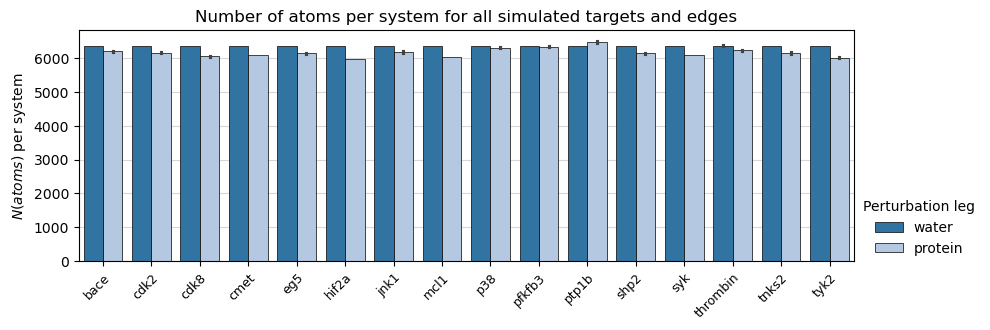

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

palette = "tab20"
fig, ax = plt.subplots(figsize=(10, 3))

barplot = sns.barplot(
    df,
    hue="system",
    x="target",
    y="final_n_atoms",
    ax=ax,
    palette=palette,
    edgecolor="black",
    linewidth=0.5,
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor",
    fontsize=9,
)
ax.set_title(
    "Number of atoms per system for all simulated targets and edges",
)
ax.set_ylabel(r"Kendall $\tau$")
ax.legend().set_visible(False)
ax.legend(
    bbox_to_anchor=(1.005, 0), loc="lower left", borderaxespad=0, frameon=False, title="Perturbation leg"
)

ax.set_ylabel("$N(atoms)$ per system")
ax.set_xlabel("")
ax.grid(axis="y", alpha=0.5)

ax.set_axisbelow(True)
plt.subplots_adjust(hspace=0.4)
fig.savefig("SystemSizes.svg", bbox_inches="tight")
plt.show()